**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
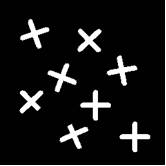
art8lab1.png: 
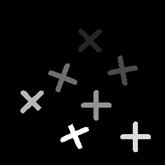
art8lab2.png: 
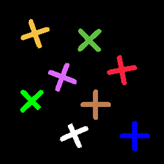
		

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [48]:
def rotulacao_componentes_conexos(imagem_binaria):
    # Inicializando rótulos
    imagem_rotulada = np.zeros_like(imagem_binaria, dtype=np.int32)
    rotulo = 1
    
    # Definindo as vizinhanças
    vizinhos = [(-1, 0), (0, -1)]  # Apenas acima e à esquerda
    
    # Passo 1: Varredura inicial da imagem
    for i in range(imagem_binaria.shape[0]):
        for j in range(imagem_binaria.shape[1]):
            if imagem_binaria[i, j] == 1:  # Se o pixel pertence a um componente
                # Verificar vizinhos
                rotulos_vizinhos = []
                for dx, dy in vizinhos:
                    x, y = i + dx, j + dy
                    if 0 <= x < imagem_binaria.shape[0] and 0 <= y < imagem_binaria.shape[1]:
                        if imagem_rotulada[x, y] > 0:
                            rotulos_vizinhos.append(imagem_rotulada[x, y])
                
                if not rotulos_vizinhos:
                    # Nenhum vizinho está rotulado, atribuir um novo rótulo
                    imagem_rotulada[i, j] = rotulo
                    rotulo += 1
                else:
                    # Atribuir o menor rótulo encontrado nos vizinhos
                    menor_rotulo = min(rotulos_vizinhos)
                    imagem_rotulada[i, j] = menor_rotulo
                    # Unificar rótulos diferentes se necessário
                    for rot in rotulos_vizinhos:
                        if rot != menor_rotulo:
                            imagem_rotulada[imagem_rotulada == rot] = menor_rotulo
    
    # Passo 2: Normalizar os rótulos para facilitar a visualização
    rotulos_unicos = np.unique(imagem_rotulada)
    for novo_rotulo, rotulo_antigo in enumerate(rotulos_unicos):
        imagem_rotulada[imagem_rotulada == rotulo_antigo] = novo_rotulo
    
    
    return imagem_rotulada

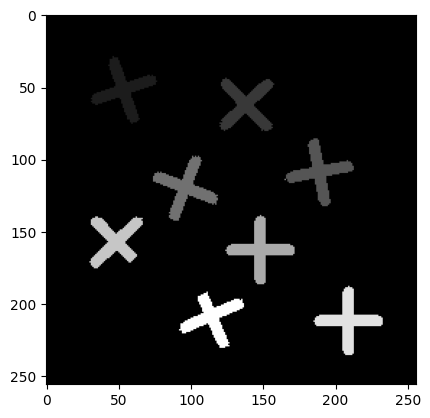

In [49]:
# Carregar a imagem binária
caminho_imagem = 'art8.png'
imagem = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)
_, imagem_binaria = cv2.threshold(imagem, 127, 1, cv2.THRESH_BINARY)

# Rotulação utilizando 4-vizinhança
imagem_rotulada_4 = rotulacao_componentes_conexos(imagem_binaria)

# Normalizar os resultados para salvar como imagens PNG
imagem_rotulada_4_norm = (imagem_rotulada_4 / imagem_rotulada_4.max() * 255).astype(np.uint8)

# # Salvar as imagens rotuladas
plt.imshow(imagem_rotulada_4_norm, cmap='gray', vmin=0, vmax=255)

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

In [50]:
def binarizar_imagem(imagem, limiar):
    _, imagem_binaria = cv2.threshold(imagem, limiar, 1, cv2.THRESH_BINARY_INV)
    return imagem_binaria

Número de objetos na imagem: 165


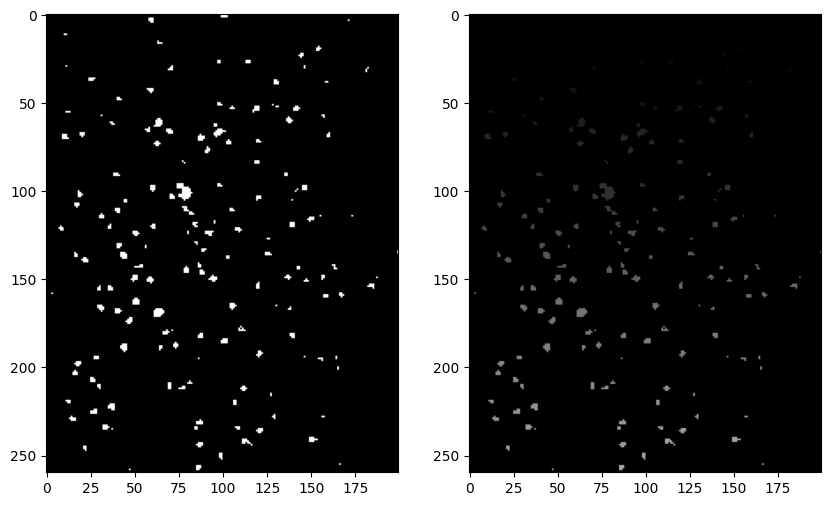

In [51]:
# Carregar a imagem original
caminho_imagem = 'clc3.png'
imagem = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)

# Binarizar a imagem com limiar de 67
imagem_binaria = binarizar_imagem(imagem, limiar=150)

# Rotulação utilizando 4-vizinhança
imagem_rotulada = rotulacao_componentes_conexos(imagem_binaria)


# Contar o número de objetos
num_objetos = len(np.unique(imagem_rotulada)) - 1  # Subtrair 1 para excluir o fundo (rótulo 0)

print(f"Número de objetos na imagem: {num_objetos}")

fig = plt.figure(figsize=(10, 7)) 

# Plotando as imagens
fig.add_subplot(1, 2, 1) 
plt.imshow(imagem_binaria, cmap='gray', vmin=0, vmax=1)
fig.add_subplot(1, 2, 2) 
plt.imshow(imagem_rotulada, cmap='gray', vmin=0, vmax=255)